# Atividade: Classificação

Enunciado:

Em um jupyter notebook:

1- Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;

2- Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;

3- Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

4- Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta.
        
        Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.
        O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.

Suba seu jupyter notebook para o GitHub e disponibilize o link da tarefa (não do repositório).

## Base de Dados

### Dataset for classification of bank notes

The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 1,372 observations with 4 input variables and 1 output variable. The variable names are as follows:

    c1: Variance of Wavelet Transformed image (continuous).
    c2: Skewness of Wavelet Transformed image (continuous).
    c3: Kurtosis of Wavelet Transformed image (continuous).
    c4: Entropy of image (continuous).
    category: Class (0 for authentic, 1 for inauthentic).

The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 50%.

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

## Leitura dos Dados

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
# Leitura do arquivo csv
df = pd.read_csv("../datasets/data_banknote_authentication.csv")
df.head()

,c1,c2,c3,c4,category
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Análise de valores nulos e estatísticas sobre os dados

In [88]:
# Verificação do tipo de dado e se existem valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   c1        1372 non-null   float64
 1   c2        1372 non-null   float64
 2   c3        1372 non-null   float64
 3   c4        1372 non-null   float64
 4   category  1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [89]:
# Algumas estatísticas sobre a base de dados
df.describe()

,c1,c2,c3,c4,category
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Separação dos conjuntos de treino e teste

In [90]:
# Ajusta formato dos dados
y = df['category']
X = df.drop(['category'], axis=1)

df.groupby('category').size().reset_index(name='qtd')

,category,qtd
0,0,762
1,1,610


## Ajusta formato dos dados


In [91]:
print(f"Shape dados de X: {X.shape} \nShape dados de y: {y.shape}")

Shape dados de X: (1372, 4) 
Shape dados de y: (1372,)


## Utilização de Regressão Logística

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.datasets import load_iris

# X, y = load_iris(return_X_y = True)

class CustomLogisticClassifier():
    def __init__(self):
        self.lrmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
    def fit(self, X, y):
        self.lrmodel.fit(X,y)
    def predict(self, X):   
        y_pred = self.lrmodel.predict(X)
        return y_pred
    

# Treina modelo
model = CustomLogisticClassifier()

# Fit do modelo
model.fit(X,y)

# Obtém a acurácia
accuracy = model.lrmodel.score(X, y)
# Obtém coeficiente da reta
coef = model.lrmodel.coef_
# Obtém o intercept (valor onde reta toca no eixo y)
intercept = model.lrmodel.intercept_
# Obtém predições
y_pred = model.predict(X)
# Calcula o MSE (Mean Squared Error)
mse = mean_squared_error(y, y_pred) 

In [93]:
print("Resultados:")
print(f"\
accuracy: {accuracy} \n\
mse: {mse} \n\
coeficientes: {coef} \n\
intercept: {intercept} \n\
             ")

Resultados:
accuracy: 0.9897959183673469 
mse: 0.01020408163265306 
coeficientes: [[-3.36496558 -1.88765064 -2.30699401 -0.08893876]] 
intercept: [3.73883455] 
             


In [94]:
set(y_pred)

{0, 1}

## Matriz de confusão

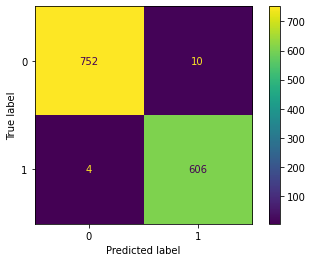

In [95]:
cm = confusion_matrix(y, y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## Plot do MSE em relação ao intercept

In [96]:
# Função plota o valor do MSE em relação ao valor do intercept
def plot_delta_intercept_mse_score(i, delta):
    list_intercept = []
    list_mse = []

    intercept_bkp = model.lrmodel.intercept_[i]
    
    # Valores a serem somados ou subtraídos ao valor do intercept
    intercepts = np.linspace(start=intercept_bkp-delta,stop=intercept_bkp+delta,num=101)

    for intercept in intercepts:
        model.lrmodel.intercept_[i] = intercept
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        list_mse.append(mse)

    model.lrmodel.intercept_[i] = intercept_bkp
    # Plota gráfico
    plt.figure(figsize=(10,5))
    plt.title("Valor do MSE ao variar o intercept")
    plt.plot(intercepts,list_mse, '-', linewidth=3, markersize=12) # [marker][line][color]
    plt.xlabel(f"Valor do Intercept {i} | Delta = {delta}")
    plt.ylabel("Valor do MSE")
    plt.grid(linestyle='--', linewidth=.2)
    
    plt.show()


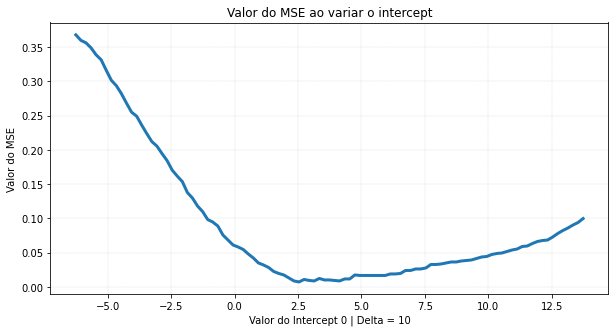

In [97]:
for i in range (len(model.lrmodel.intercept_)):
    plot_delta_intercept_mse_score(i, delta=10)

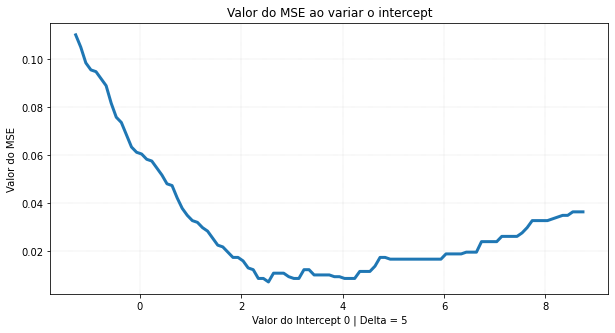

In [98]:
for i in range (len(model.lrmodel.intercept_)):
    plot_delta_intercept_mse_score(i, delta=5)

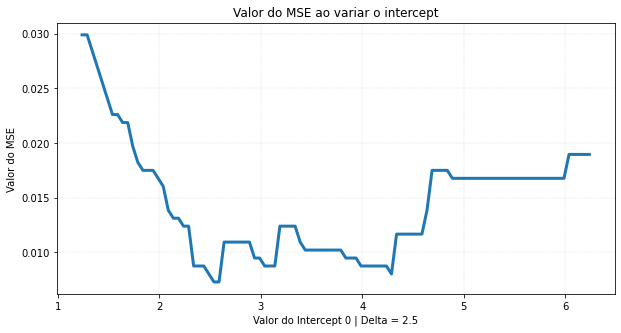

In [99]:
for i in range (len(model.lrmodel.intercept_)):
    plot_delta_intercept_mse_score(i, delta=2.5)